In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import time
import seaborn as sn

In [2]:
data = pd.read_csv('spam_tfidf.csv')
data.shape  # il dataset ha 4600 righe e 58 colonne
data.head()  # vediamo le prime 5 righe del dataset

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,targhet
0,0,0.000000,1.04567,0.570084,0.0,0.309696,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.553776,0.000000,0.00000,1
1,1,0.309672,0.45748,0.445378,0.0,0.135492,0.427637,0.365548,0.120390,0.000000,...,0.000000,0.0,0.0,0.00000,0.069628,0.0,0.264787,0.214164,0.08707,1
2,2,0.088478,0.00000,0.632436,0.0,1.190396,0.290182,0.330734,0.206383,1.141600,...,0.131159,0.0,0.0,0.01762,0.075430,0.0,0.196455,0.218923,0.01814,1
3,3,0.000000,0.00000,0.000000,0.0,0.609715,0.000000,0.539619,1.083511,0.552962,...,0.000000,0.0,0.0,0.00000,0.072265,0.0,0.097516,0.000000,0.00000,1
4,4,0.000000,0.00000,0.000000,0.0,0.609715,0.000000,0.539619,1.083511,0.552962,...,0.000000,0.0,0.0,0.00000,0.071210,0.0,0.096092,0.000000,0.00000,1


In [3]:
# data processing
X = data.drop('targhet', axis=1)
y = data['targhet']  # colonna che segna se è o meno spam

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [4]:
def ang_kernel(x, y):
    return np.arccos(-np.dot(x, y.T) / (np.linalg.norm(x) * np.linalg.norm(y)))

Training time with C = 1.0: 1.876786
Prediction time: 0.243420
Miss-classified examples: 371
Accuracy: 0.597
Training time with C = 10.0: 0.626553
Prediction time: 0.112694
Miss-classified examples: 205
Accuracy: 0.777
Training time with C = 100.0: 0.444077
Prediction time: 0.151352
Miss-classified examples: 205
Accuracy: 0.777
Training time with C = 1000.0: 0.420456
Prediction time: 0.135832
Miss-classified examples: 203
Accuracy: 0.780
Training time with C = 10000.0: 0.346126
Prediction time: 0.092744
Miss-classified examples: 204
Accuracy: 0.779
Training time with C = 100000.0: 0.751055
Prediction time: 0.118184
Miss-classified examples: 203
Accuracy: 0.780
Training time with C = 1000000.0: 0.396890
Prediction time: 0.114045
Miss-classified examples: 205
Accuracy: 0.777
Training time with C = 10000000.0: 0.405102
Prediction time: 0.132847
Miss-classified examples: 205
Accuracy: 0.777


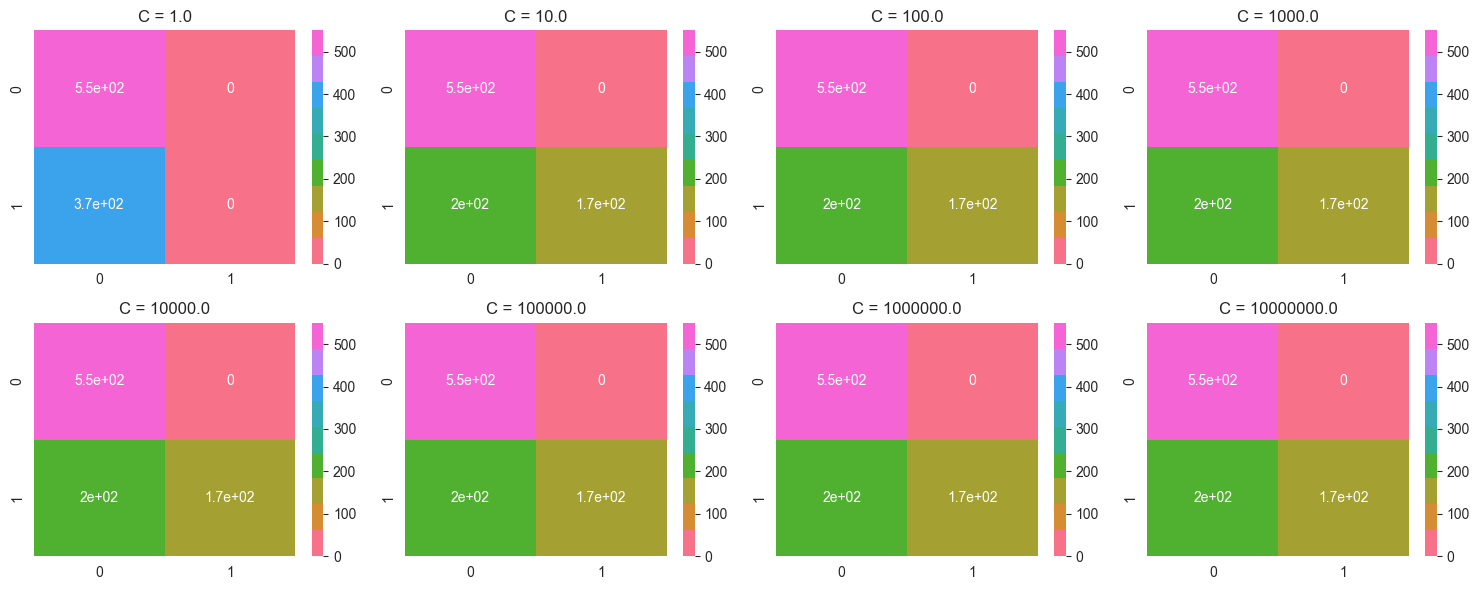

In [10]:
# qui faccio il learning
import matplotlib.pyplot as plt
c: list = [1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0]
fis, axs = plt.subplots(2, 4, figsize=(15, 6))

for i in range(8):
    svcclassifier = SVC(kernel=ang_kernel, C=c[i])
    start_time = time.time()
    svcclassifier.fit(X_train, y_train)
    print(f'Training time with C = {c[i]}: %f' % (time.time() - start_time))
    start_time = time.time()
    y_predict = svcclassifier.predict(X_test)
    print('Prediction time: %f' % (time.time() - start_time))
    print('Miss-classified examples: %d' % (y_test != y_predict).sum())
    print('Accuracy: %.3f' % accuracy_score(y_test, y_predict))
    cm = confusion_matrix(y_test, y_predict)
    sn.heatmap(cm, annot=True, ax=axs[int(i / 4), i % 4], cmap=sn.color_palette("husl", 9))
    axs[int(i / 4), i % 4].set_title('C = ' + str(c[i]))
plt.tight_layout()
plt.show()

In [11]:
fis.savefig('confusion matrix per svm angolare.png', bbox_inches='tight')